# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval")
print("------------------------")


url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}"

city_data = []

record_count = 1
set_count = 1


for i, city in enumerate(cities):
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    city_url = f"{url}&q={city}"
    
    print(f"Processing city #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    
    try:
        city_weather = requests.get(city_url).json()
        
        time.sleep(2)
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"] ["humidity"]
        city_clouds = city_weather["clouds"] ["all"]
        city_wind = city_weather["wind"] ["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print(f"{city} has an error. Skiping...")
        pass
 

print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing city #1 in group #1 | castro
Processing city #2 in group #1 | margate
Processing city #3 in group #1 | rikitea
Processing city #4 in group #1 | hasaki
Processing city #5 in group #1 | jamestown
Processing city #6 in group #1 | busselton
Processing city #7 in group #1 | port elizabeth
Processing city #8 in group #1 | cape town
Processing city #9 in group #1 | saint-philippe
Processing city #10 in group #1 | vostok
Processing city #11 in group #1 | beysehir
Processing city #12 in group #1 | mount isa
Processing city #13 in group #1 | torbay
Processing city #14 in group #1 | govindgarh
Processing city #15 in group #1 | ushuaia
Processing city #16 in group #1 | dikson
Processing city #17 in group #1 | tuktoyaktuk
Processing city #18 in group #1 | hermanus
Processing city #19 in group #1 | butaritari
Processing city #20 in group #1 | schertz
Processing city #21 in group #1 | pundaguitan
Processing city #22 in group #1 | kurayoshi


illoqqortoormiut has an error. Skiping...
Processing city #29 in group #4 | ketchikan
Processing city #30 in group #4 | upernavik
Processing city #31 in group #4 | fasa
Processing city #32 in group #4 | shahkot
Processing city #33 in group #4 | tawkar
tawkar has an error. Skiping...
Processing city #34 in group #4 | bardiyah
Processing city #35 in group #4 | kondoa
Processing city #36 in group #4 | mananjary
Processing city #37 in group #4 | moerai
Processing city #38 in group #4 | santa rosa
Processing city #39 in group #4 | guerrero negro
Processing city #40 in group #4 | burnie
Processing city #41 in group #4 | marcona
marcona has an error. Skiping...
Processing city #42 in group #4 | umzimvubu
umzimvubu has an error. Skiping...
Processing city #43 in group #4 | nchelenge
Processing city #44 in group #4 | liling
Processing city #45 in group #4 | shenjiamen
Processing city #46 in group #4 | belushya guba
belushya guba has an error. Skiping...
Processing city #47 in group #4 | mount g

Processing city #6 in group #8 | cabo san lucas
Processing city #7 in group #8 | la labor
Processing city #8 in group #8 | corpus christi
Processing city #9 in group #8 | puerto carreno
Processing city #10 in group #8 | liverpool
Processing city #11 in group #8 | kloulklubed
Processing city #12 in group #8 | camana
Processing city #13 in group #8 | pimentel
Processing city #14 in group #8 | portland
Processing city #15 in group #8 | klaksvik
Processing city #16 in group #8 | denpasar
Processing city #17 in group #8 | jibuti
Processing city #18 in group #8 | bulungu
Processing city #19 in group #8 | kopavogur
Processing city #20 in group #8 | yaring
Processing city #21 in group #8 | santa fe
Processing city #22 in group #8 | asau
Processing city #23 in group #8 | sioux lookout
Processing city #24 in group #8 | nagornskiy
Processing city #25 in group #8 | akdepe
Processing city #26 in group #8 | georgetown
Processing city #27 in group #8 | whitehorse
Processing city #28 in group #8 | tro

Processing city #41 in group #11 | cayenne
Processing city #42 in group #11 | ilhabela
Processing city #43 in group #11 | saleaula
saleaula has an error. Skiping...
Processing city #44 in group #11 | pueblo
Processing city #45 in group #11 | moose factory
Processing city #46 in group #11 | samusu
samusu has an error. Skiping...
Processing city #47 in group #11 | pombas
Processing city #48 in group #11 | pringsewu
Processing city #49 in group #11 | newburn
Processing city #50 in group #11 | ust-omchug
Processing city #1 in group #12 | muros
Processing city #2 in group #12 | qasigiannguit
Processing city #3 in group #12 | ulladulla
Processing city #4 in group #12 | plavsk
Processing city #5 in group #12 | xai-xai
Processing city #6 in group #12 | camapua
Processing city #7 in group #12 | akhisar
Processing city #8 in group #12 | magadan
Processing city #9 in group #12 | clyde river
Processing city #10 in group #12 | adrar
Processing city #11 in group #12 | killybegs
Processing city #12 i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,67.01,96,100,6.69,BR,1644000054
1,margate,51.3813,1.3862,42.89,70,1,4.00,GB,1644000056
2,rikitea,-23.1203,-134.9692,78.46,71,9,10.63,PF,1644000000
3,hasaki,35.7333,140.8333,28.69,44,97,21.79,JP,1644000061
4,jamestown,42.0970,-79.2353,21.09,62,100,3.00,US,1643999782


In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.00000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.593093,19.90130,49.294347,73.454383,60.801431,9.016762,1.644001e+09
std,34.285599,89.51117,31.455717,20.725834,41.171052,6.820497,4.218002e+02
min,-54.800000,-175.20000,-38.870000,8.000000,0.000000,0.000000,1.644000e+09
25%,-9.783350,-59.08375,26.500000,62.000000,15.500000,3.725000,1.644000e+09
50%,24.353900,23.26670,58.480000,78.000000,75.000000,7.450000,1.644001e+09
75%,48.964300,100.07120,76.135000,89.000000,100.000000,12.660000,1.644001e+09
max,78.218600,179.31670,96.310000,100.000000,100.000000,45.160000,1.644001e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index

print(dirty_city_data)


Int64Index([], dtype='int64')


In [8]:
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castro,-24.7911,-50.0119,67.01,96,100,6.69,BR,1644000054
1,margate,51.3813,1.3862,42.89,70,1,4.00,GB,1644000056
2,rikitea,-23.1203,-134.9692,78.46,71,9,10.63,PF,1644000000
3,hasaki,35.7333,140.8333,28.69,44,97,21.79,JP,1644000061
4,jamestown,42.0970,-79.2353,21.09,62,100,3.00,US,1643999782


In [9]:
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

clean_city_data.to_csv(output_data_file, index_label="City_TD")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

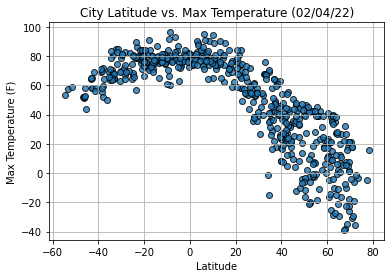

In [10]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig1.png")

## Latitude vs. Humidity Plot

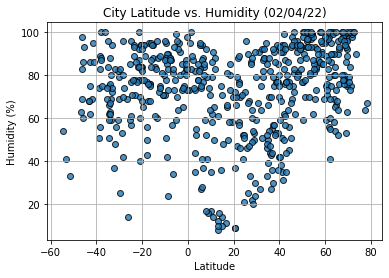

In [11]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

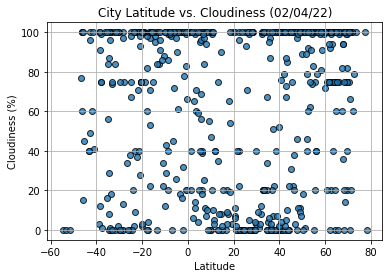

In [12]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

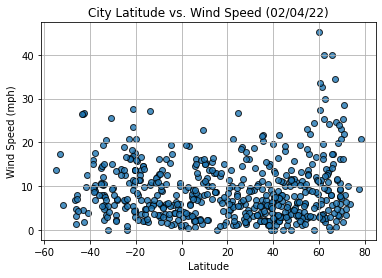

In [13]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Fig4.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
def plot_linear_regression(x_values, y_values, title, text_coordinates): 
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"the r-value is: {rvalue**2}")
    plt.show()

In [15]:
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

the r-value is: 0.7194478494235841


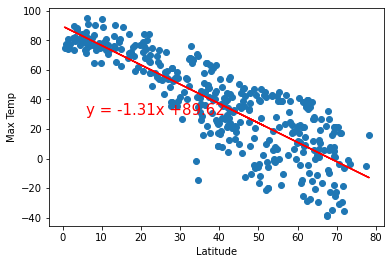

In [16]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.40715746014389953


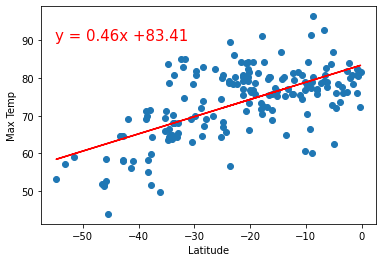

In [17]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.1635514641992244


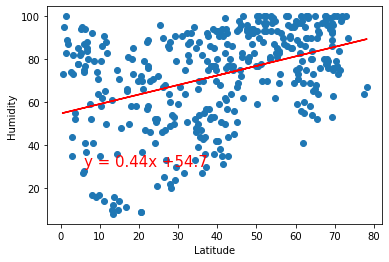

In [18]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.03908562631249822


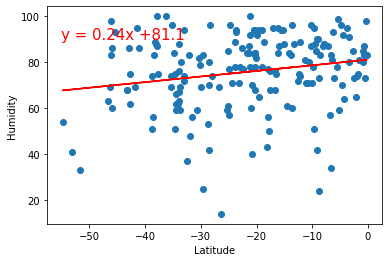

In [19]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-55,90))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.08905647206186301


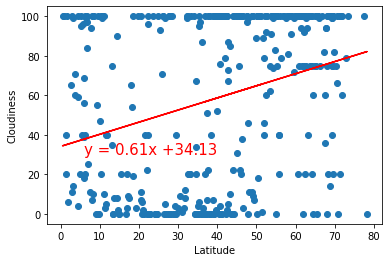

In [20]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.03936000095757783


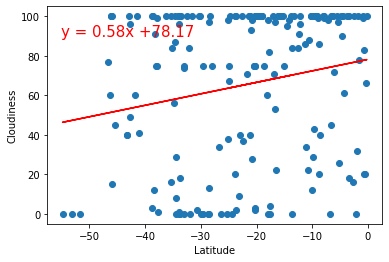

In [21]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-55,90))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.033011045231139347


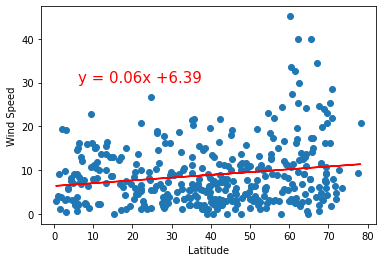

In [22]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,30))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.03177851083079235


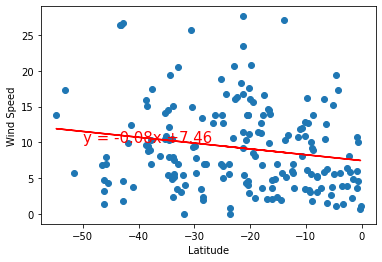

In [29]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50,10))